
## About the Dataset
- The dataset contains raw credit card transactions with the following fields:  
  `trans_date_trans_time`, `cc_num`, `merchant`, `category`, `amt`, `first`, `last`, `gender`, `street`, `city`, `state`, `zip`, `lat`, `long`, `city_pop`, `job`, `dob`, `trans_num`, `unix_time`, `merch_lat`, `merch_long`, `is_fraud`
- **Target variable:** `is_fraud` (1 = Fraud, 0 = Legitimate)  
- Contains a mix of numerical, categorical, and identifier fields.  
- **Challenges:** High-cardinality features (`zip`), missing values, imbalanced classes, PII fields that need to be removed.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df=pd.read_csv('../artifacts/raw.csv')

## Top 5 Records

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.shape

(9999, 23)

## Checking Missing Value

In [5]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### their is no missing values in dataset

## Checking For Duplicates 

In [6]:
df.duplicated().sum()

np.int64(0)

#### their is no duplicate values

## Check Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9999 non-null   int64  
 1   trans_date_trans_time  9999 non-null   object 
 2   cc_num                 9999 non-null   int64  
 3   merchant               9999 non-null   object 
 4   category               9999 non-null   object 
 5   amt                    9999 non-null   float64
 6   first                  9999 non-null   object 
 7   last                   9999 non-null   object 
 8   gender                 9999 non-null   object 
 9   street                 9999 non-null   object 
 10  city                   9999 non-null   object 
 11  state                  9999 non-null   object 
 12  zip                    9999 non-null   int64  
 13  lat                    9999 non-null   float64
 14  long                   9999 non-null   float64
 15  city

## Checking Unique Number Of Values For Each Column

In [8]:
df.nunique()

Unnamed: 0               9999
trans_date_trans_time    9894
cc_num                    903
merchant                  693
category                   14
amt                      6671
first                     335
last                      462
gender                      2
street                    903
city                      832
state                      50
zip                       892
lat                       890
long                      891
city_pop                  818
job                       475
dob                       889
trans_num                9999
unix_time                9894
merch_lat                9996
merch_long               9998
is_fraud                    2
dtype: int64

## Check Statistics Of Dataset

In [9]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000
mean,4999.000000,4.240587e+17,68.415379,49322.610961,38.594648,-90.617096,8.985949e+04,1.325645e+09,38.594499,-90.608158,0.004700
std,2886.607005,1.318612e+18,111.533341,27188.491294,5.180174,14.459441,3.001342e+05,1.678880e+05,5.208998,14.477357,0.068402
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.165823,-166.550779,0.000000
25%,2499.500000,1.800365e+14,9.690000,25832.000000,34.778900,-97.171400,7.410000e+02,1.325472e+09,34.848237,-97.225265,0.000000
50%,4999.000000,3.520550e+15,48.670000,48438.000000,39.390000,-87.724600,2.395000e+03,1.325654e+09,39.373000,-87.663973,0.000000
75%,7498.500000,4.657269e+15,83.095000,72341.000000,41.846700,-80.128400,1.909000e+04,1.325801e+09,41.899503,-80.180696,0.000000
max,9998.000000,4.992346e+18,3178.510000,99783.000000,65.689900,-67.950300,2.906700e+06,1.325908e+09,66.645176,-66.967742,1.000000


## Numerical Feature Insights

The summary statistics above provide key insights into the numerical features used for training the fraud detection model.

### Dataset Size and Target Distribution
- The dataset contains **9,999 transactions**.
- The target variable `is_fraud` has a **mean of ~0.0047**, indicating a **highly imbalanced dataset** with fraud cases being very rare (~0.47%).
- This confirms the need for imbalance-handling techniques such as class weighting or resampling.

### Transaction Amount (`amt`)
- Transaction amounts range from **$1.01 to $3,178.51**.
- The data is **right-skewed**, with a median of **$48.67** and a much higher maximum.
- Scaling is required to prevent large transactions from dominating the model.

### Location-Based Features
- Cardholder location (`lat`, `long`) and merchant location (`merch_lat`, `merch_long`) fall within valid geographic ranges.
- The close similarity between cardholder and merchant coordinates suggests potential for **distance-based feature engineering** to detect abnormal transaction locations.

### ZIP Code (`zip`)
- ZIP codes range from **1,257 to 99,783**, indicating coverage across multiple U.S. regions.
- ZIP codes are treated as **categorical identifiers rather than continuous numerical values**, and are handled using frequency encoding.

### City Population (`city_pop`)
- City population varies widely from **23 to over 2.9 million**, showing high variance.
- This feature may help distinguish urban vs rural transaction patterns and is scaled due to its wide range.

### Time Feature (`unix_time`)
- The `unix_time` feature shows a narrow standard deviation, indicating transactions occur within a limited time window.
- It is useful for deriving temporal features such as transaction hour or day patterns.

### Dropped or Identifier Features
- `Unnamed: 0` is an index column and does not carry predictive information.
- `cc_num` is a unique identifier and is excluded to avoid data leakage.

### Key Takeaways
- The dataset contains a mix of high-variance numerical features and encoded categorical identifiers.
- Proper scaling, encoding, and class imbalance handling are essential for building a robust fraud detection model.


## Seprate Numerical And Categorical Features

In [10]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 11 numerical features : ['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

we have 12 categorical features : ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


## Handling ZIP Code Feature

Although the `zip` column is stored as an integer, it does **not represent a numerical quantity**.
ZIP codes are **geographical identifiers**, not continuous values, and arithmetic operations on them are meaningless.

Therefore:
- `zip` is treated as a **categorical feature**
- It is removed from the numerical feature list
- It is added to the categorical feature list for encoding


In [11]:

numeric_features.remove('zip')
categorical_features.append('zip')


In [12]:
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 10 numerical features : ['Unnamed: 0', 'cc_num', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

we have 13 categorical features : ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'zip']


## Dropped Numerical Columns
- **`Unnamed: 0`**: Index column with no predictive value.
- **`cc_num`**: Credit card number is a unique identifier and may cause data leakage.

In [13]:

df = df.drop(columns=['Unnamed: 0', 'cc_num'])


In [14]:
numeric_features.remove('Unnamed: 0')
numeric_features.remove('cc_num')

## Droping Some categorical columns
The following features were removed due to low predictive value or privacy concerns:
- **first, last**: Personal identifiers
- **street, city, state**: High-cardinality location descriptors
- **trans_num**: Unique transaction identifier

In [15]:

df = df.drop(columns=['first', 'last', 'street', 'city', 'state', 'trans_num'])
categorical_features.remove('first')
categorical_features.remove('last')
categorical_features.remove('street')
categorical_features.remove('city')
categorical_features.remove('state')
categorical_features.remove('trans_num')

## Unique Values Of Categorical Coloumns

In [16]:
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values → {df[col].unique()}")

trans_date_trans_time: 9894 unique values → ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2019-01-07 03:52:34' '2019-01-07 03:53:12' '2019-01-07 03:53:51']
merchant: 693 unique values → ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abe

## Handling Categorical Features

- **trans_date_trans_time** → Feature engineering (extract hour, day of week, month, etc.)  
  Reason: Almost unique per transaction, low value as-is. Extracting time components can provide meaningful features.

- **merchant** → Apply frequency encoding  
  Reason: Too many unique values (693). Frequency encoding keeps the information without creating too many sparse columns.

- **category** → Keep as-is (can one-hot or label encode)  
  Reason: Only 14 unique values, directly useful.

- **gender** → Keep as-is  
  Reason: Binary feature, directly useful.

- **job** → Optional: transform or drop  
  Reason: Very high cardinality (475). Can extract job type or seniority if relevant; otherwise drop.

- **dob** → Drop or transform to age  
  Reason: Raw date adds little predictive value; converting to age is more meaningful.

- **zip** → Keep and apply frequency encoding  
  Reason: Geographic info is useful; frequency encoding keeps info compact and usable for modeling.


In [17]:

df['dob'] = pd.to_datetime(df['dob'], errors='coerce')  
today = pd.to_datetime('today')
df['age'] = (today - df['dob']).dt.days

numeric_features.append('age')

categorical_features.remove('dob')

df.drop(columns=['dob'], inplace=True)


In [18]:
if 'job' in categorical_features:
    categorical_features.remove('job')

df.drop(columns=['job'], inplace=True)

In [19]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour'] = df['trans_date_trans_time'].dt.hour
df['month'] = df['trans_date_trans_time'].dt.month

df['is_weekend'] = df['trans_date_trans_time'].dt.weekday.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

df.drop('trans_date_trans_time', axis=1, inplace=True)

numeric_features.extend(['hour', 'month'])
categorical_features.remove('trans_date_trans_time')
categorical_features.append('is_weekend')


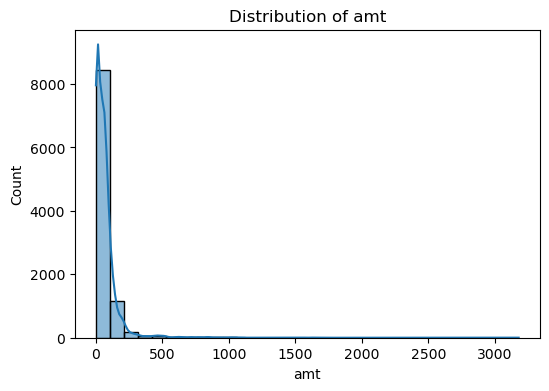

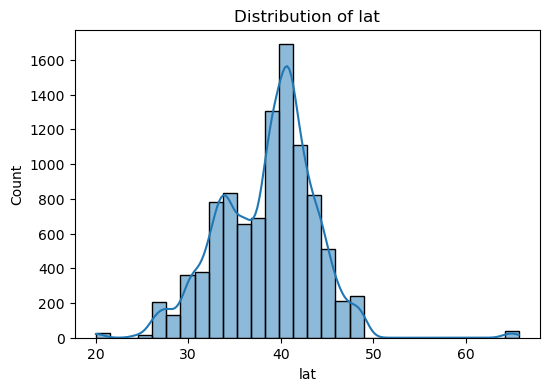

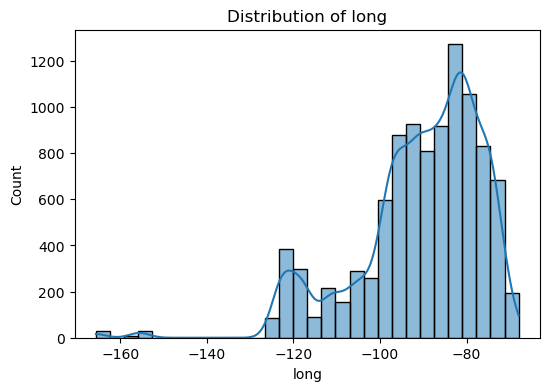

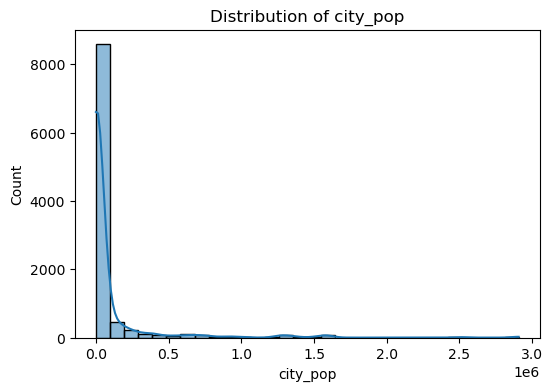

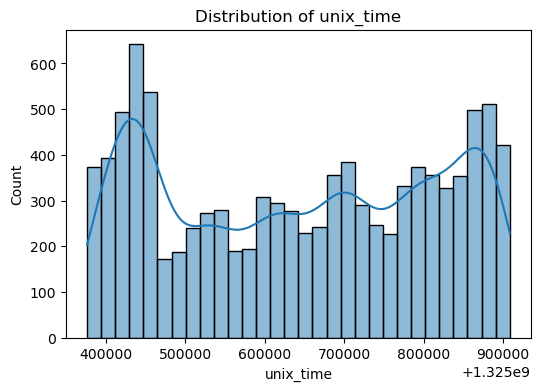

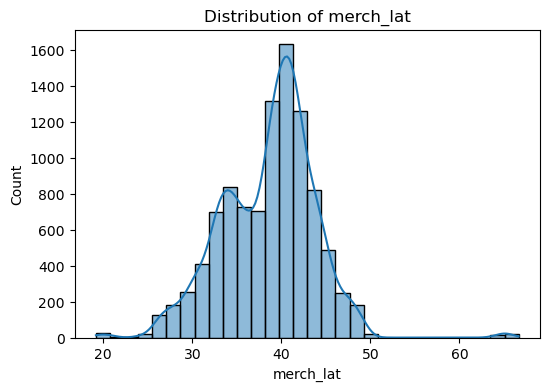

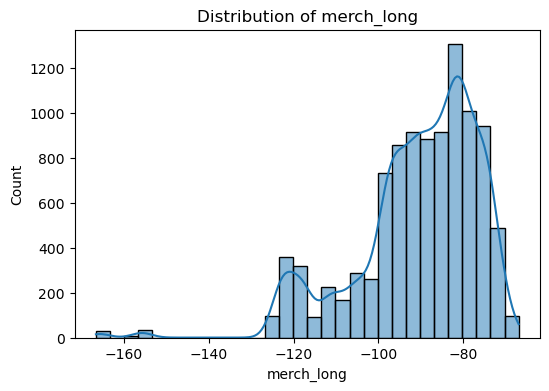

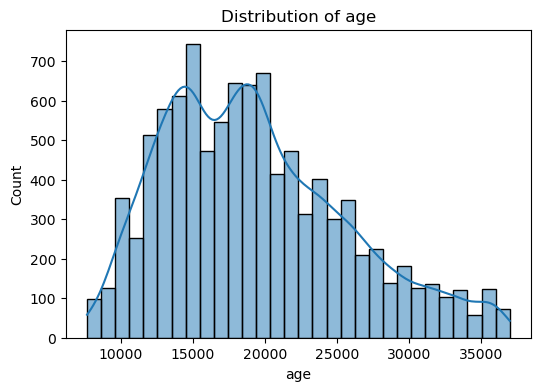

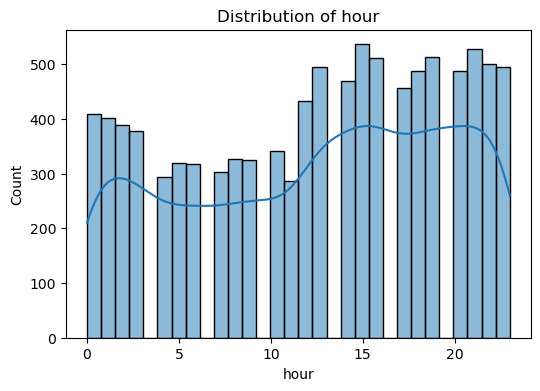

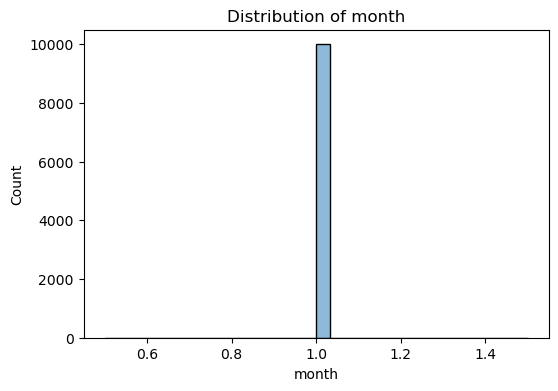

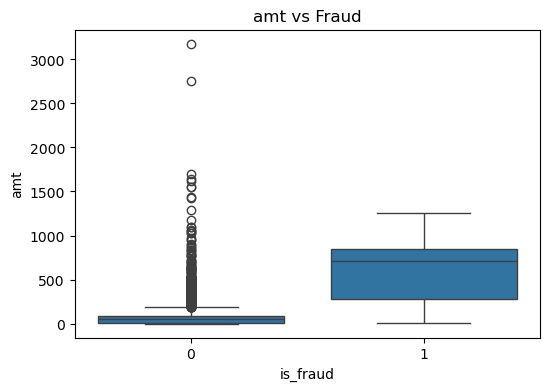

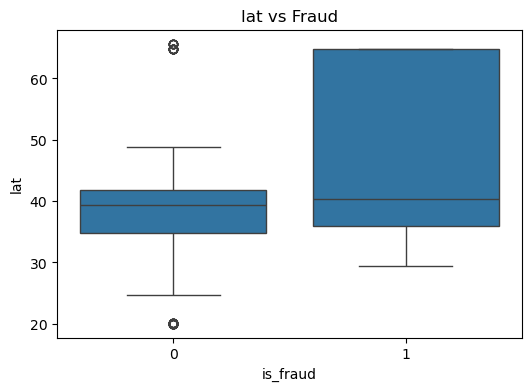

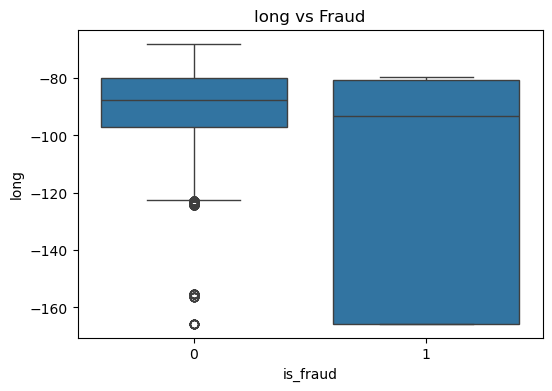

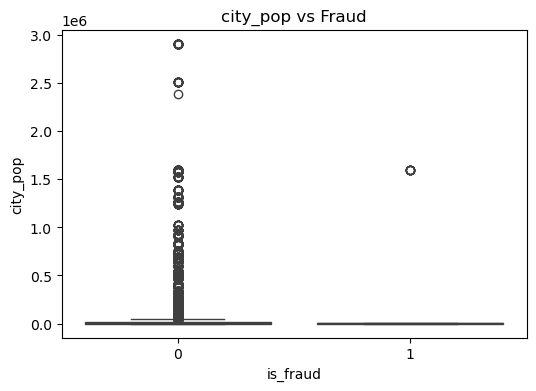

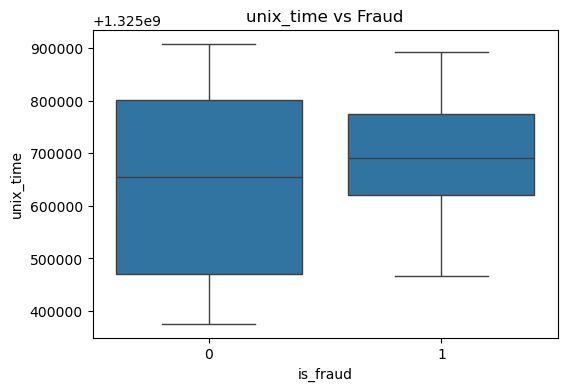

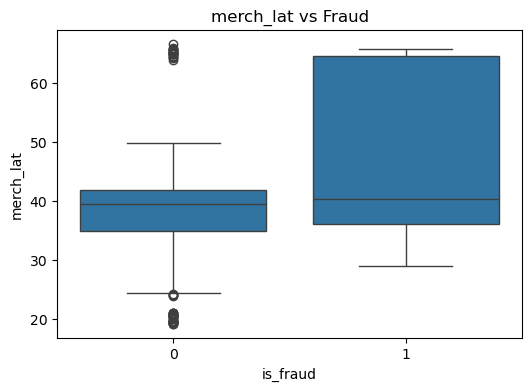

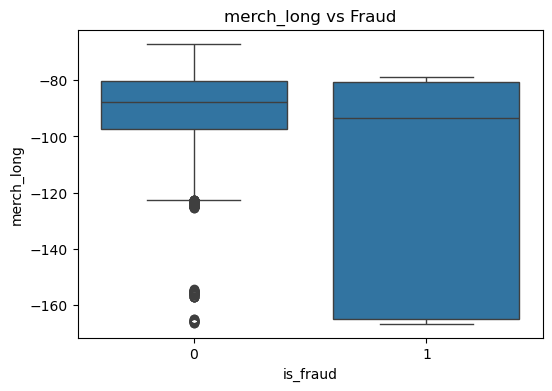

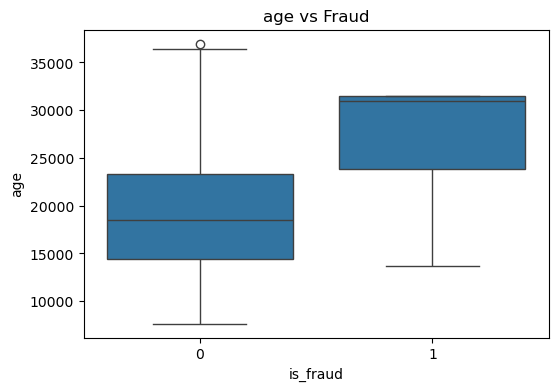

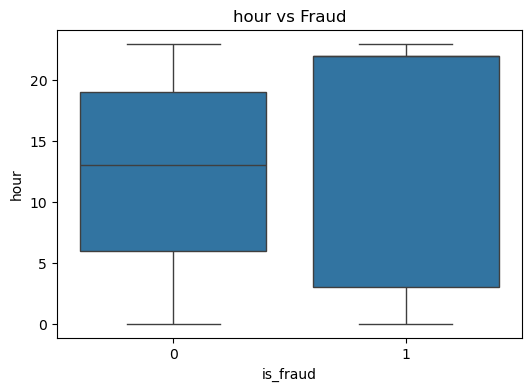

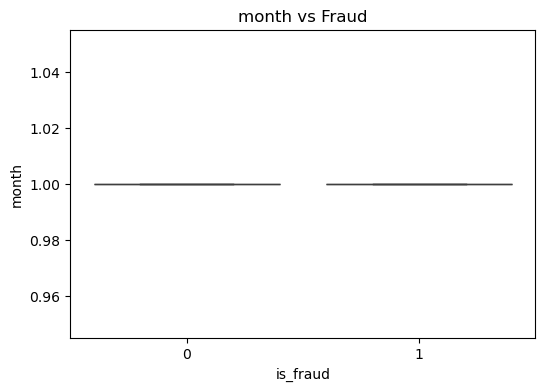

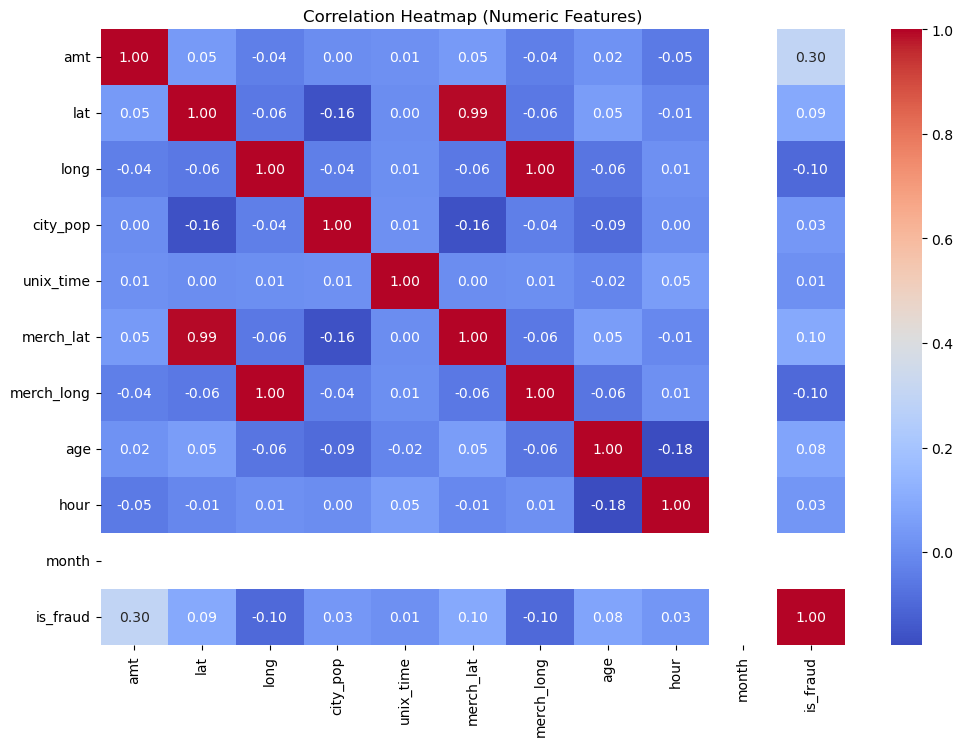

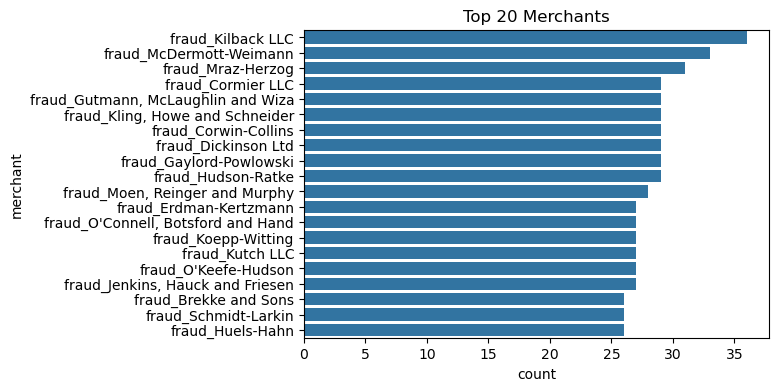

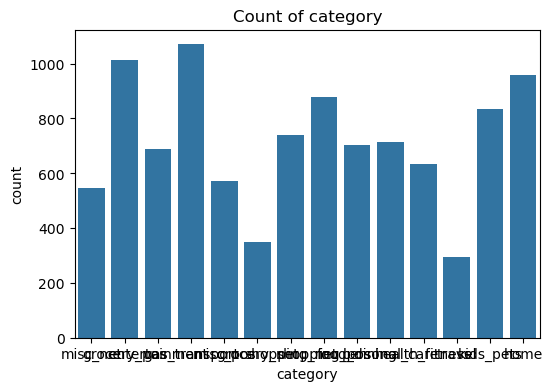

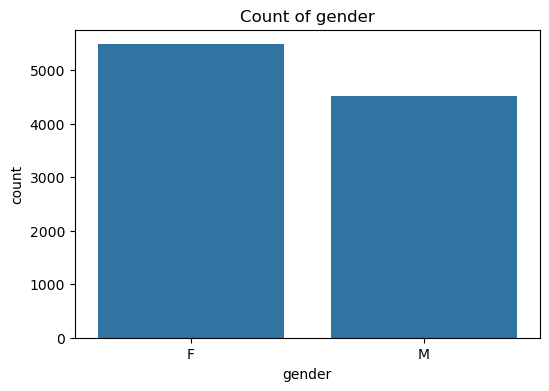

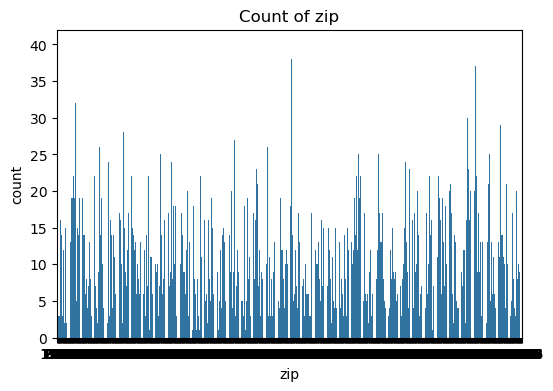

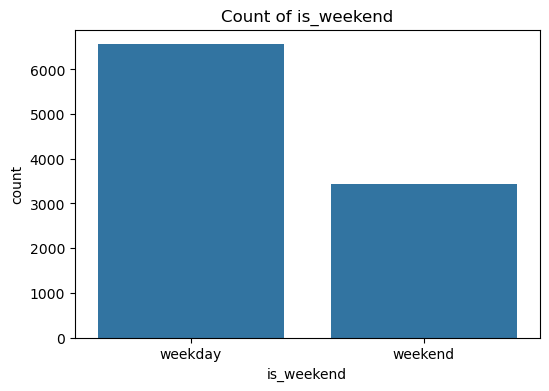

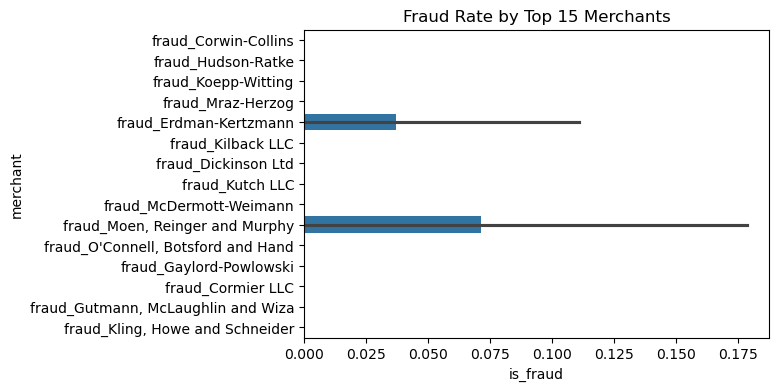

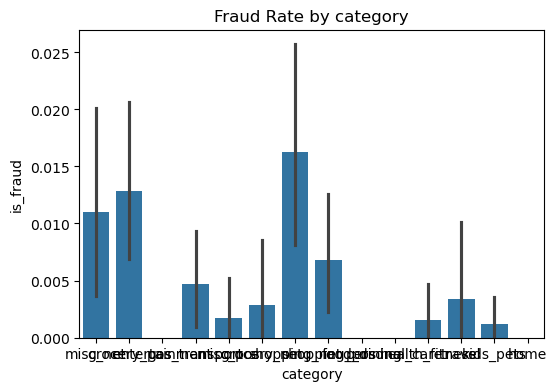

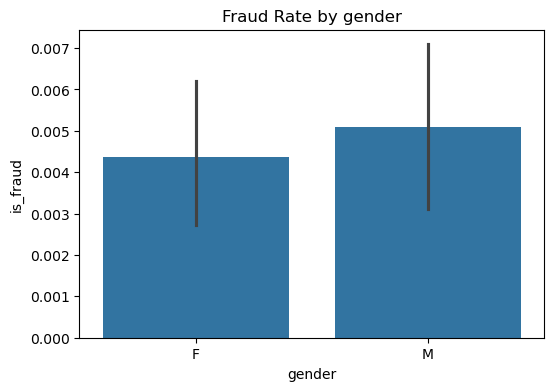

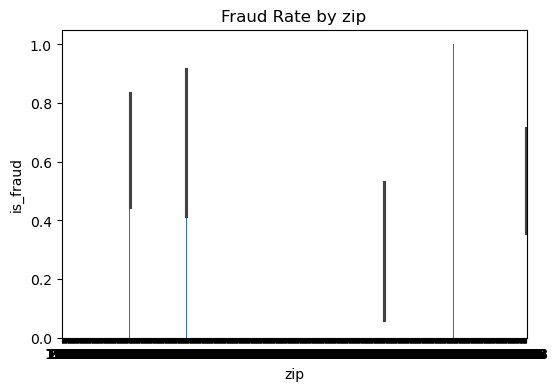

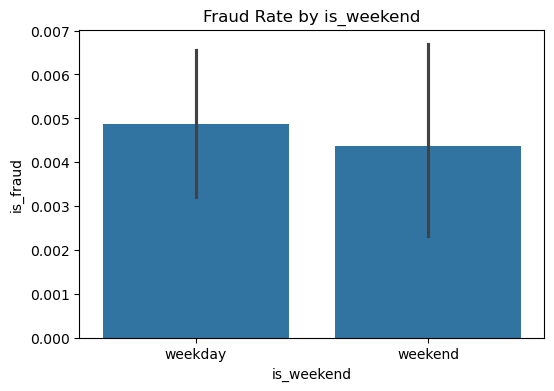

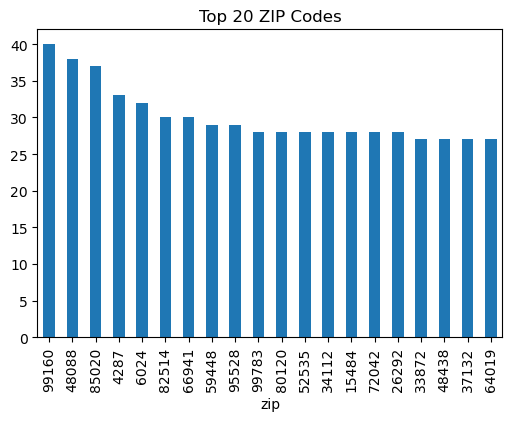

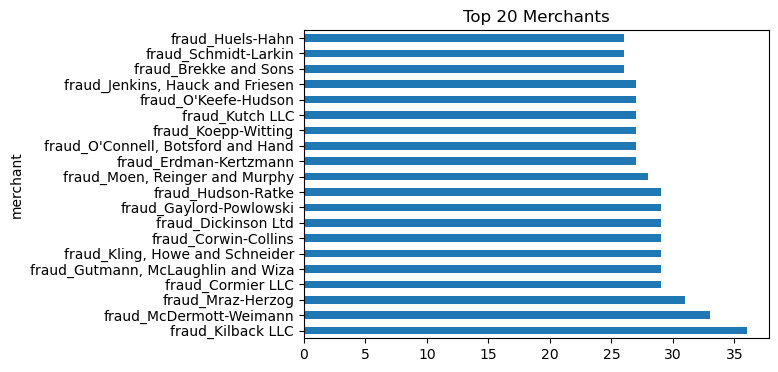

In [20]:
target='is_fraud'
numeric_features.remove('is_fraud')
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# =============================
# 2. NUMERIC FEATURES vs TARGET
# =============================
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f'{col} vs Fraud')
    plt.show()

# =============================
# 3. CORRELATION HEATMAP (NUMERIC)
# =============================
plt.figure(figsize=(12, 8))
corr = df[numeric_features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# =============================
# 4. CATEGORICAL FEATURE COUNTS
# =============================
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    
    # Limit merchant plot to top 20 for readability
    if col == 'merchant':
        top_merchants = df[col].value_counts().nlargest(20).index
        sns.countplot(y=col, data=df[df[col].isin(top_merchants)],
                      order=top_merchants)
        plt.title('Top 20 Merchants')
    else:
        sns.countplot(x=col, data=df)
        plt.title(f'Count of {col}')
    
    plt.show()

# =============================
# 5. CATEGORICAL FEATURES vs TARGET
# =============================
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    
    if col == 'merchant':
        top_merchants = df[col].value_counts().nlargest(15).index
        sns.barplot(
            y=col,
            x=target,
            data=df[df[col].isin(top_merchants)],
            estimator='mean'
        )
        plt.title('Fraud Rate by Top 15 Merchants')
    else:
        sns.barplot(x=col, y=target, data=df, estimator='mean')
        plt.title(f'Fraud Rate by {col}')
    
    plt.show()

# =============================
# 6. ZIP & MERCHANT FREQUENCY CHECK
# =============================
plt.figure(figsize=(6, 4))
df['zip'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 ZIP Codes")
plt.show()

plt.figure(figsize=(6, 4))
df['merchant'].value_counts().head(20).plot(kind='barh')
plt.title("Top 20 Merchants")
plt.show()


## EDA Conclusion – Feature Selection & Outlier Handling

After performing exploratory data analysis (EDA), correlation analysis, and domain-driven reasoning for credit card fraud detection, the following decisions were made regarding feature retention, transformation, and removal.

---

### Features Retained

#### **Transaction Behavior**
- **amt**
  - Strongly associated with fraudulent transactions.
  - Fraud cases often involve unusually high transaction amounts.
  - Outliers were **not removed** as they carry critical fraud signals.

- **hour**
  - Fraud activity shows higher concentration during late or unusual hours.
  - Retained as a numeric behavioral feature.

- **is_weekend**
  - Captures behavioral differences between weekday and weekend transactions.
  - Retained as a categorical feature.

---

#### **Customer & Location Context**
- **age**
  - Derived from date of birth and provides demographic context.
  - Retained as a numeric feature.

- **city_pop**
  - Represents population density of the customer’s city.
  - May influence fraud patterns due to urban vs rural differences.

- **zip**
  - ZIP code is categorical by nature despite being numeric in format.
  - High cardinality handled using **frequency encoding**.
  - Retained to capture regional risk patterns.

---

#### **Merchant & Transaction Type**
- **merchant**
  - High-cardinality categorical feature.
  - Encoded using **frequency encoding** to avoid dimensional explosion.
  - Final usefulness to be confirmed via fraud-rate vs frequency analysis.

- **category**
  - Contains a limited number of transaction types.
  - Significant variation in fraud rates observed across categories.
  - Retained and encoded using **One-Hot Encoding**.

- **gender**
  - Low-cardinality demographic feature.
  - Retained for potential behavioral patterns.

---

### Features Removed

- **lat, long, merch_lat, merch_long**
  - Extremely high correlation between customer and merchant coordinates.
  - Redundant once ZIP-based regional information is used.
  - Removed to reduce multicollinearity.

- **unix_time**
  - Raw timestamp provided little direct predictive value.
  - Redundant after extracting `hour` and `is_weekend`.
  - Removed.

- **month**
  - All transactions occur within a single month.
  - Zero variance feature with no learning value.
  - Removed.

---

### Outlier Handling Strategy

- Outliers were **not removed**, especially for transaction amount.
- In fraud detection, extreme values often correspond to fraudulent behavior.

---

### Summary

The final feature set balances predictive power, data integrity, and real-world applicability.  
It avoids redundancy, prevents data leakage, handles high-cardinality features safely, and aligns with industry-standard fraud detection practices.  
The dataset is now ready for preprocessing pipelines, model training, and deployment.


In [21]:
cols_to_drop = [
    'lat',
    'long',
    'merch_lat',
    'merch_long',
    'unix_time',
    'month'
]

df = df.drop(columns=cols_to_drop)


In [22]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    9999 non-null   object 
 1   category    9999 non-null   object 
 2   amt         9999 non-null   float64
 3   gender      9999 non-null   object 
 4   zip         9999 non-null   int64  
 5   city_pop    9999 non-null   int64  
 6   is_fraud    9999 non-null   int64  
 7   age         9999 non-null   int64  
 8   hour        9999 non-null   int32  
 9   is_weekend  9999 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 742.2+ KB


,merchant,category,amt,gender,zip,city_pop,is_fraud,age,hour,is_weekend
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,3495,0,13820,0,weekday
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,149,0,17369,0,weekday
2,fraud_Lind-Buckridge,entertainment,220.11,M,83252,4154,0,23366,0,weekday
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,1939,0,21547,0,weekday
4,fraud_Keeling-Crist,misc_pos,41.96,M,24433,99,0,14532,0,weekday


In [23]:
df.to_csv("../artifacts/clean_raw_data.csv", index=False)
df.shape

(9999, 10)